# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


# Notes
- we used the GPT2 model
- we used the GPT2 tokenizer with this settings 
  - use_fast=True
  - add_prefix_space=False
- in this case we used only the tokens that are digits [0-9] for GPT2 and ASMR
- using the floatingPointPartitioner

# Loading data of samples without max length limit

In [9]:
asmr_data = pd.read_csv('../csv/asmr/asmr_10k.csv')
repeated_values_asmr = asmr_data['floating-point'].value_counts()
print(repeated_values_asmr)

floating-point
0.500    2548
0.100    1145
0.600     668
0.200     659
0.700     656
         ... 
0.373       1
0.727       1
0.015       1
0.669       1
0.552       1
Name: count, Length: 285, dtype: int64


In [10]:
outlines_data = pd.read_csv('../csv/outlines/outlines_10k.csv')
repeated_values_outlines = outlines_data['floating-point'].value_counts()
print(repeated_values_outlines)

floating-point
0.0000    1002
0.5000     866
0.1000     680
0.2000     350
0.3000     344
          ... 
0.5540       1
0.2680       1
0.1965       1
0.6140       1
0.2630       1
Name: count, Length: 641, dtype: int64


In [11]:
llm_data = pd.read_csv('../csv/llm/llm_10k.csv')
repeated_values_llm = llm_data['floating-point'].value_counts()
print(repeated_values_llm)

floating-point
0.50000    1436
0.10000     971
0.20000     448
0.30000     427
0.00000     396
           ... 
0.84141       1
0.66150       1
0.74600       1
0.77120       1
0.63421       1
Name: count, Length: 2348, dtype: int64


# Plots

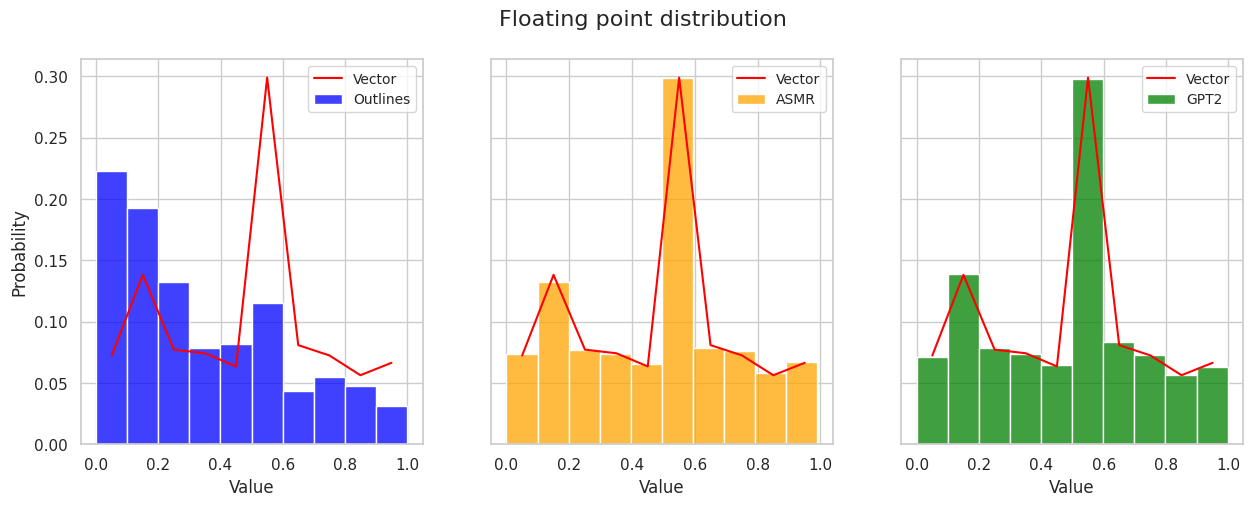

In [12]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(outlines_data['floating-point'], bins=10, stat='probability', label='Outlines', ax=axs[0], color = 'blue')
sns.histplot(asmr_data['floating-point'], bins=10, stat='probability', label='ASMR', ax=axs[1], color='orange')
sns.histplot(llm_data['floating-point'], bins=10, stat='probability', label='GPT2', ax=axs[2], color='green')

#this is the same vector of probabilities used in the length1 notebook, cause we only using 10 bins
vector = [0.07235368508406921, 0.1380868579365871, 0.07713241182190415, 0.07416619932308573, 0.06344642027043924, 0.29891086356400415, 0.08080755356832184, 0.07243128692171712, 0.05626469225328908, 0.0664000292565824]
for i, ax in enumerate(axs):
    ax.plot([i/10 + 0.05 for i in range(10)], vector, color='red', label='Vector')
    
fig.suptitle('Floating point distribution', fontsize=16)
for ax in axs:
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)
    ax.legend(fontsize=10)

plt.show()
